# The Sparks Foundation - Task 5

### Exploratory Data Analysis

In [1]:
__author__ = "Mrunal Salvi"
__email__ = "mrunalsalvi94@gmail.com"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.getcwd()

'C:\\Users\\Mrunal\\Documents\\Sparks Foundation Internship'

In [4]:
df = pd.read_csv('SampleSuperstore.csv')

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

### There are no null values in the data set

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
num_cols = list(df.select_dtypes('number'))
num_cols

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [12]:
cat_cols = list(df.select_dtypes('object'))
cat_cols

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

### We need to find weak features, and how we can increase the profit

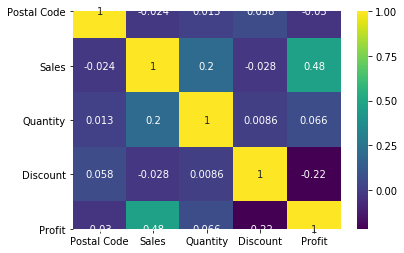

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [13]:
correlation = df.corr() # For numerical variables only

import seaborn as sns
sns.heatmap(correlation, xticklabels = correlation.columns.values, yticklabels = correlation.columns.values, annot=True, cmap = 'viridis')
plt.show()
correlation

### We make an inference that there is high correlation between:

- Sales and Quantity **(2 features)**
- Sales and Profit **(feature and target)**
- Discount and Profit **(feature and target)**

#### We focus on:
1. Sales
2. Discount
3. Quantity

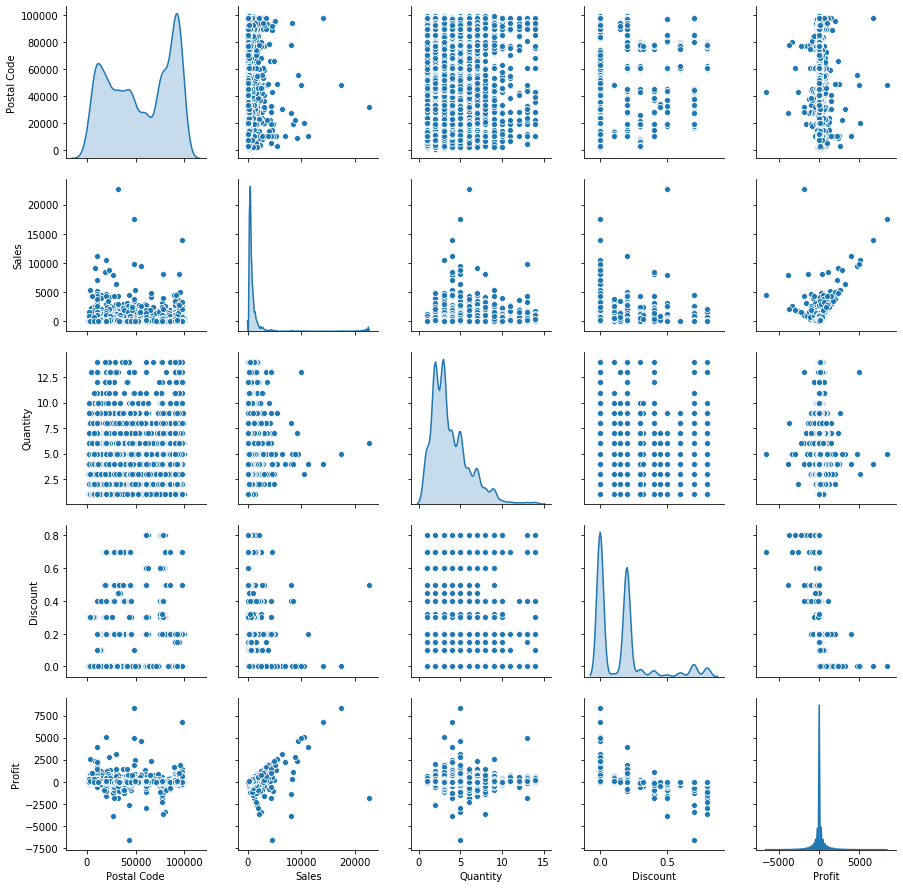

In [14]:
sns.pairplot(df, palette="Set2", diag_kind="kde")
plt.show()

Text(0, 0.5, 'Quantity count')

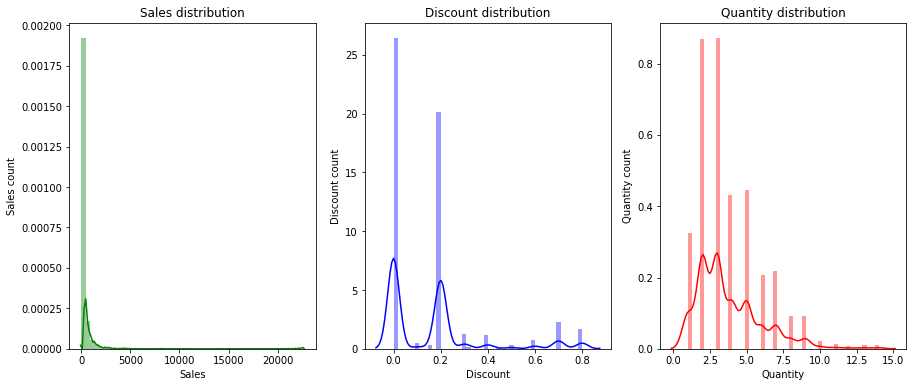

In [15]:
# Visualization of satisfaction, evaluation, project count

fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.Sales, kde=True, color='green', ax=ax_1)
ax_1.set_title('Sales distribution')
ax_1.set_ylabel('Sales count')

sns.distplot(df.Discount, kde=True, color='blue', ax=ax_2)
ax_2.set_title('Discount distribution')
ax_2.set_ylabel('Discount count')

sns.distplot(df.Quantity, kde=True, color='red', ax=ax_3)
ax_3.set_title('Quantity distribution')
ax_3.set_ylabel('Quantity count')

### We can check SALES across different CATEGORIES, COUNTRY, REGION etc. in the superstore

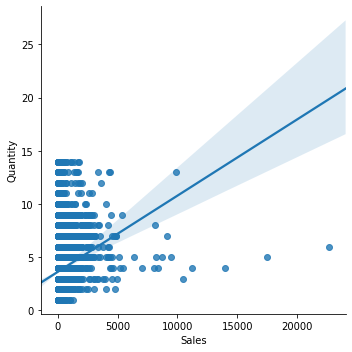

In [16]:
sns.lmplot(x='Sales', y='Quantity', data=df, fit_reg=True)

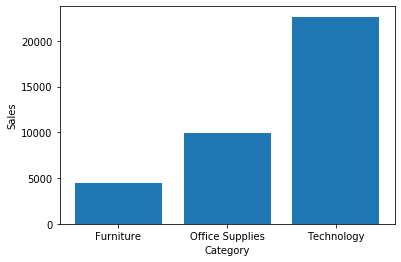

In [17]:
### Sales per category

plt.bar(df['Category'],df['Sales'])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

Text(0, 0.5, 'Number')

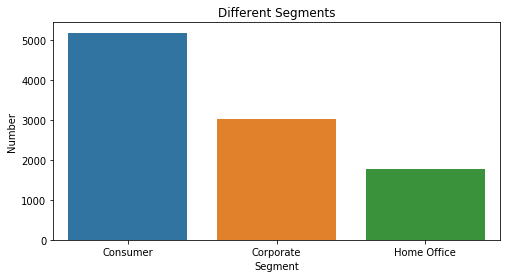

In [18]:
plt.figure(figsize=(8,4))
sns.countplot('Segment',data=df)
plt.title('Different Segments')
plt.xlabel('Segment')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

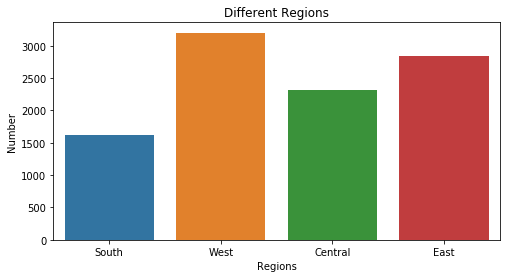

In [19]:
plt.figure(figsize=(8,4))
sns.countplot('Region',data=df)
plt.title('Different Regions')
plt.xlabel('Regions')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

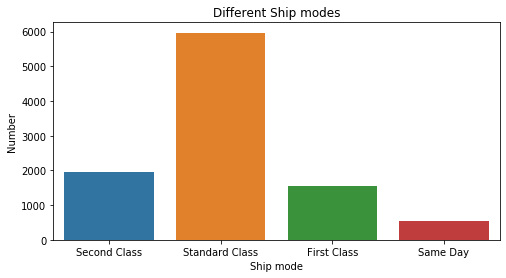

In [20]:
plt.figure(figsize=(8,4))
sns.countplot('Ship Mode',data=df)
plt.title('Different Ship modes')
plt.xlabel('Ship mode')
plt.ylabel('Number')

In [21]:
df.drop('Country',axis=1,inplace=True)
df.drop('Postal Code',axis=1,inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [22]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [23]:
df = df.drop_duplicates()

### Profit visualization

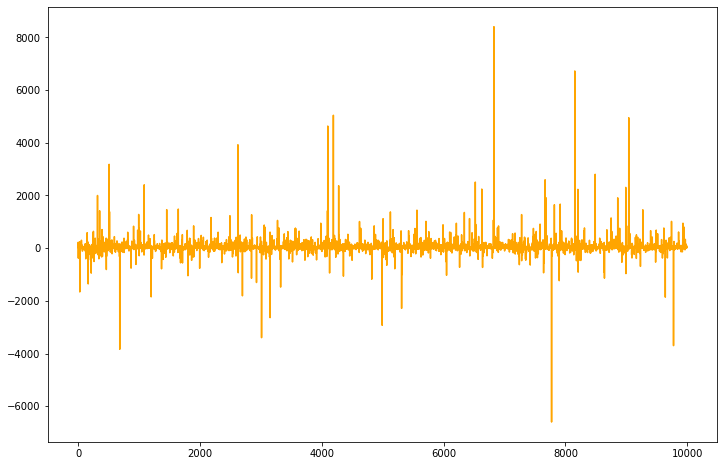

In [24]:
plt.figure(figsize=(12,8))
plt.plot(df['Profit'], color ='orange')

### Profit and discount

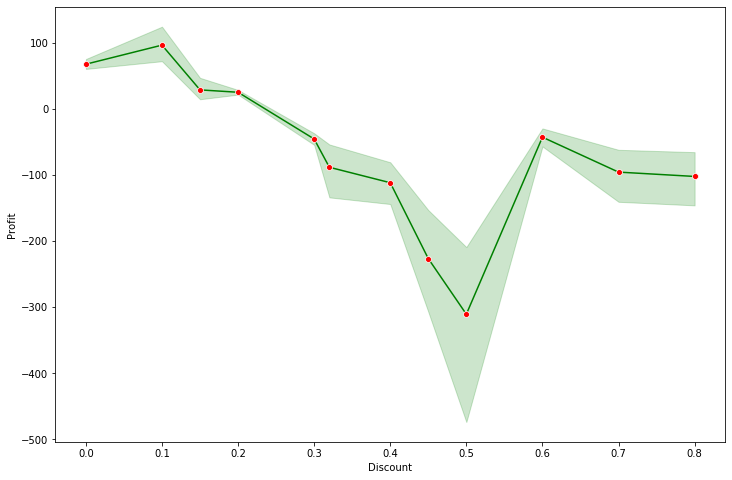

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Discount', y='Profit', data = df, color = 'green', marker = 'o', markerfacecolor='red')

### Sales and Profit

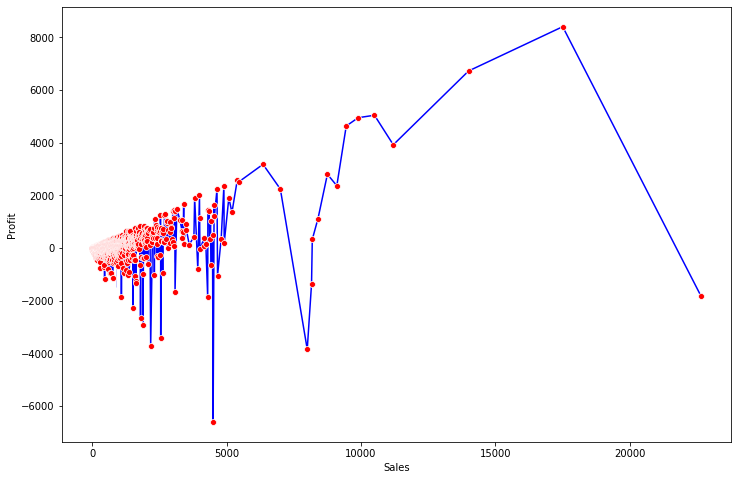

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Sales', y='Profit', data = df, color = 'blue', marker = 'o', markerfacecolor='red')

### Distribution by state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

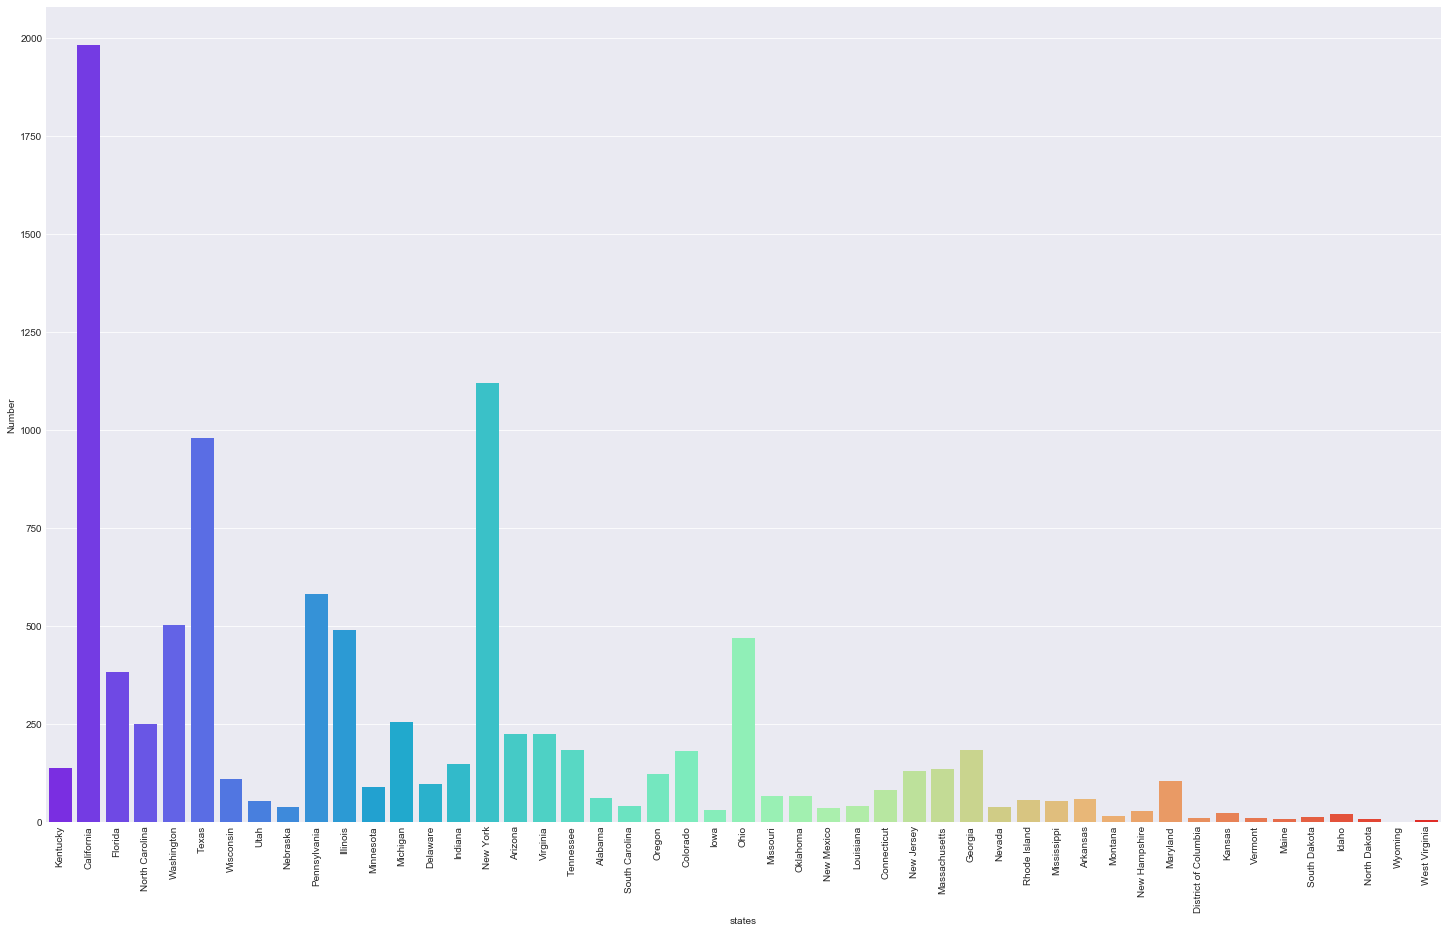

In [27]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(25,15))
sns.countplot(df['State'], palette='rainbow')
plt.xlabel('states')
plt.ylabel('Number')
plt.xticks(rotation=90)

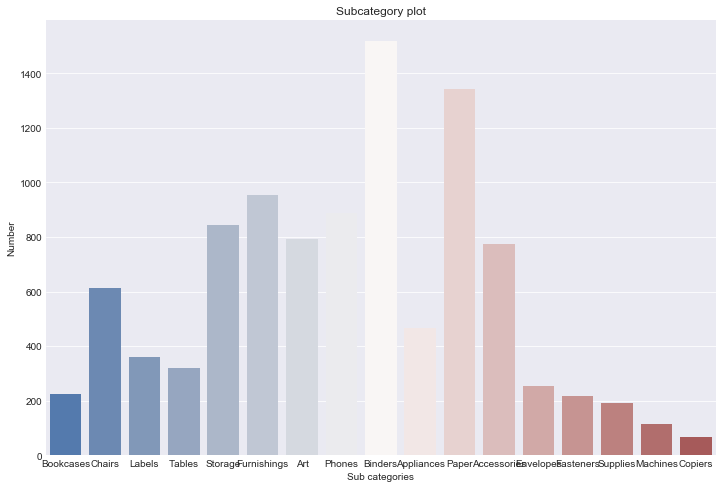

In [28]:
plt.figure(figsize=(12,8))

sns.countplot(df['Sub-Category'], palette ='vlag')
plt.title('Subcategory plot')
plt.xlabel('Sub categories')
plt.ylabel('Number')
plt.show()

### Profit distribution by state

Text(0.5, 1.0, 'Profit by state')

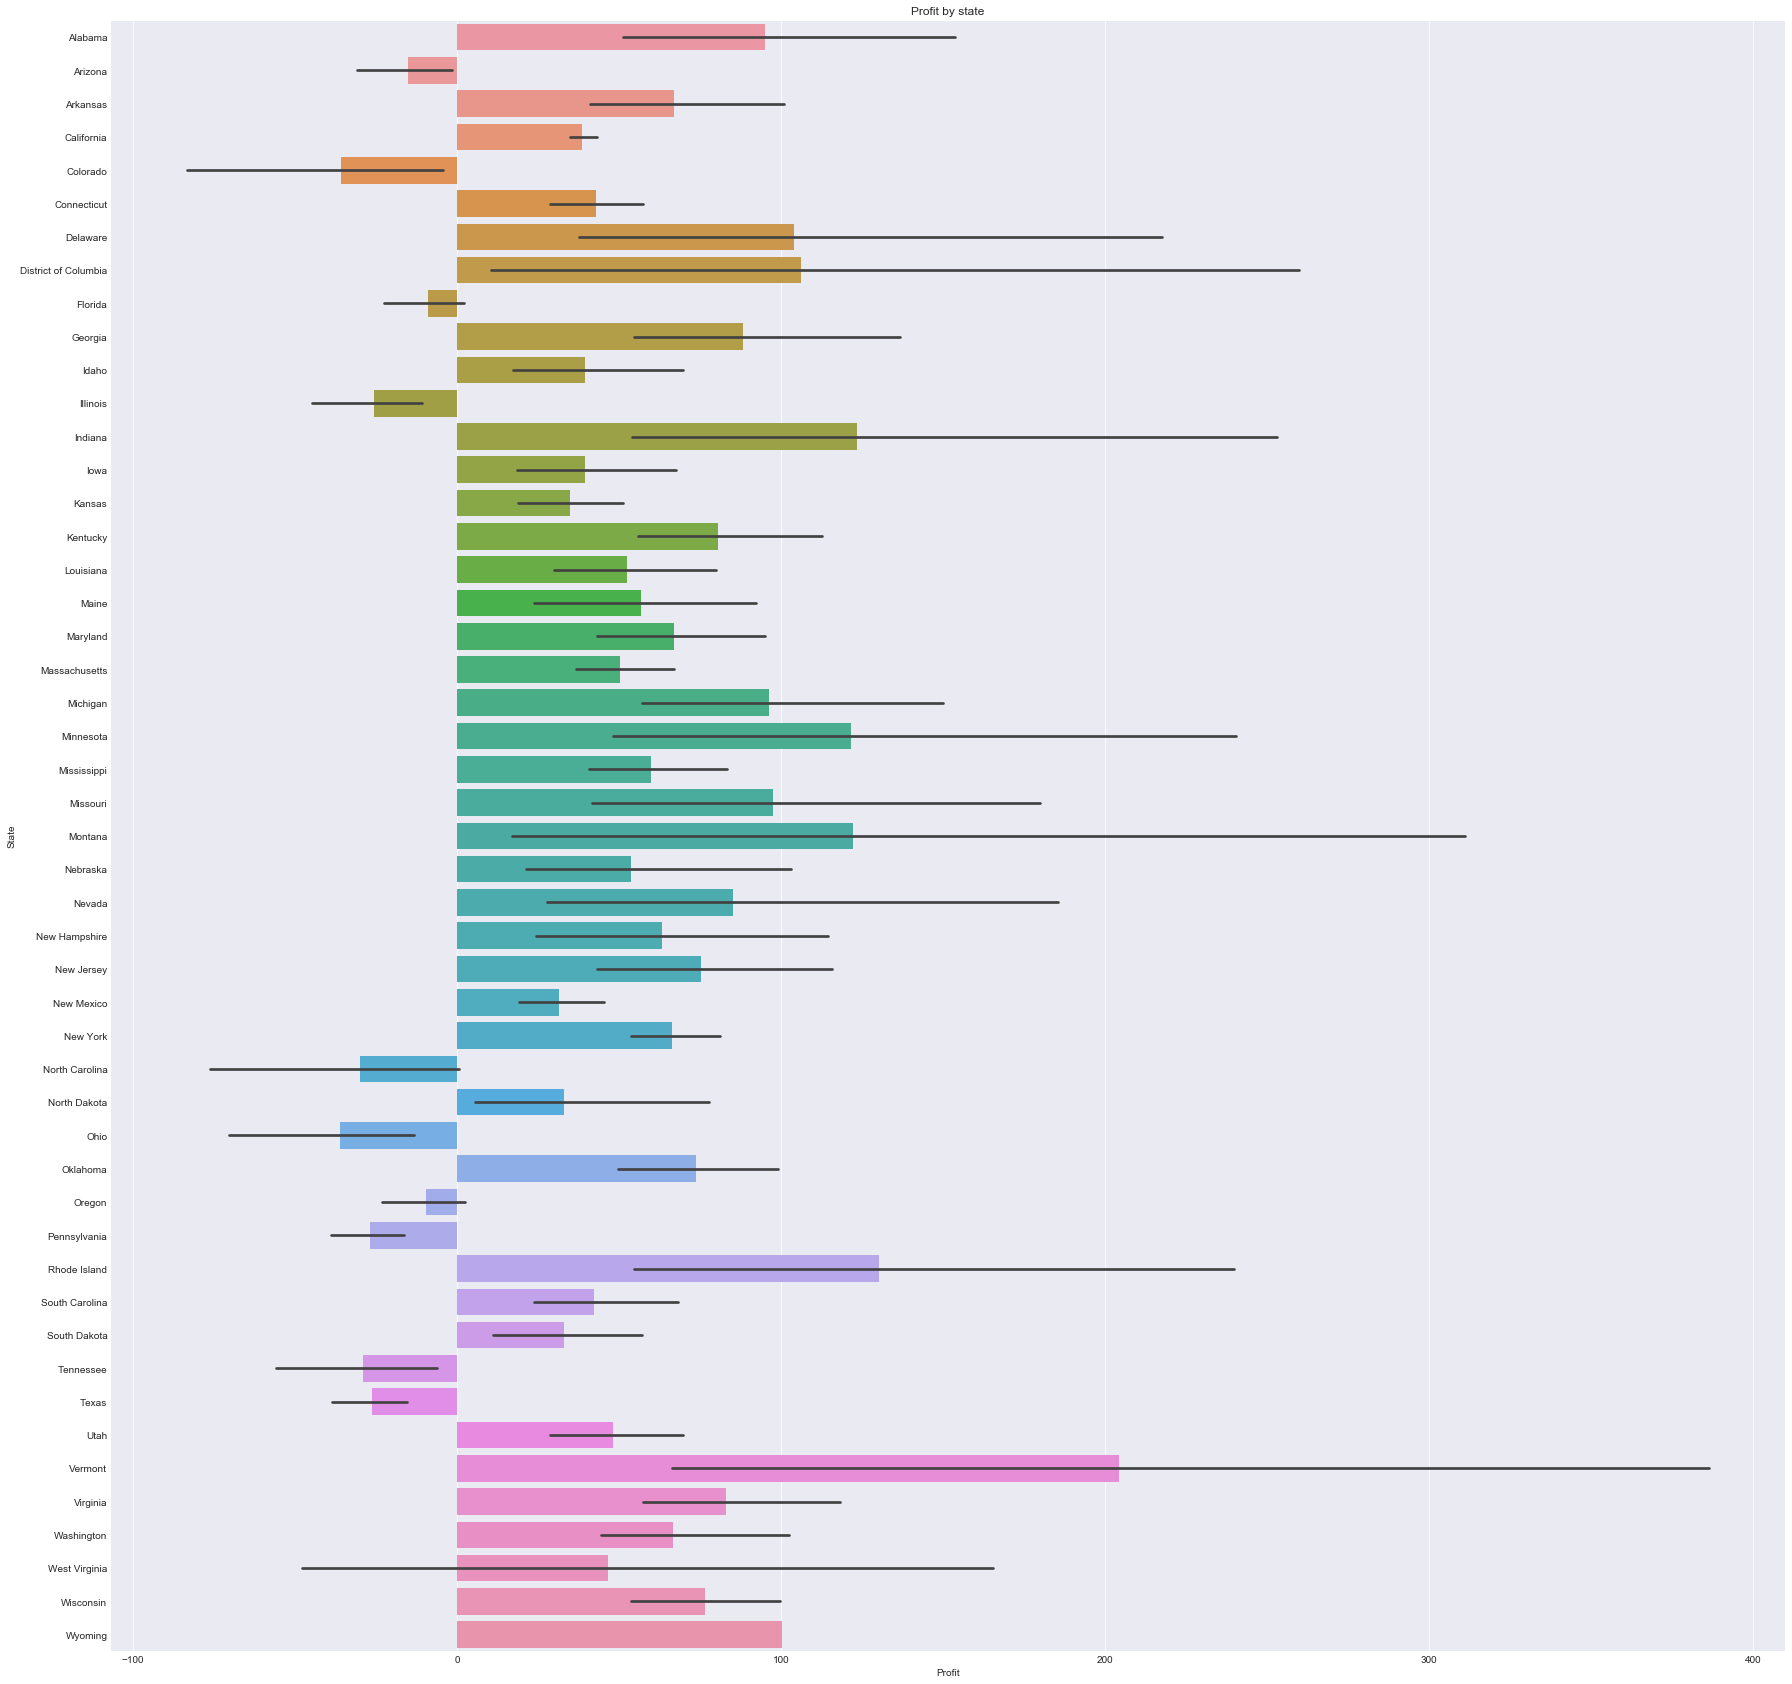

In [29]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(30,30))
sns.barplot(x = df['Profit'], y=df['State'].sort_values(ascending=True))
plt.xlabel('Profit')
plt.ylabel('State')
plt.title('Profit by state')

### This must be enough data visualization to understand different features and their correlation with target.